<a href="https://colab.research.google.com/github/KenDaupsey/Parametric-Repeated-Measures-Tests-One-way-Repated-ANOVA-and-One-Way-Logistic-Regression/blob/main/Parametric_Repeated_Measures_Tests_One_way_Repated_ANOVA_and_One_Way_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*** Parametric Repeated Measures Tests: One-way Repated ANOVA and One-Way Logistic Regression ***

** One_Way Repeated Measures ANOVA **

In [1]:
### Import Necessar Libraries
import pandas as pd
import numpy as np

In [2]:
# Load the dataset from GitHub URL
url = "https://raw.githubusercontent.com/KenDaupsey/One-Way-Repeated-measures-ANOVA/main/Oneway%20Repeated%20Measures%20ANOVA%7Erb4.csv"
df = pd.read_csv(url)

In [3]:
## One-way repeated measures ANOVA
# Assume data formatted properly

import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM

# Assuming df is your DataFrame
# Repeated measures ANOVA
anova_rm = AnovaRM(df, 'y', 'a', within=['s'])
results = anova_rm.fit()

# Print the ANOVA table
print(results.summary())

             Anova
  F Value Num DF  Den DF Pr > F
-------------------------------
s  3.2034 7.0000 21.0000 0.0180



<Figure size 640x480 with 0 Axes>

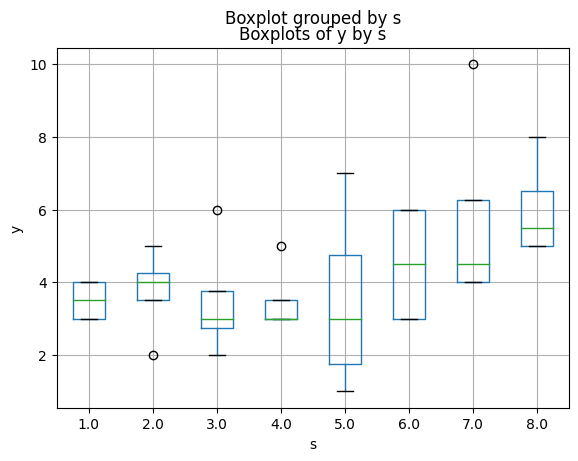

In [4]:
### Boxplots of y by s

import matplotlib.pyplot as plt
plt.figure()
df.boxplot(column='y', by='s')
plt.xlabel('s')
plt.ylabel('y')
plt.title('Boxplots of y by s')
plt.show()

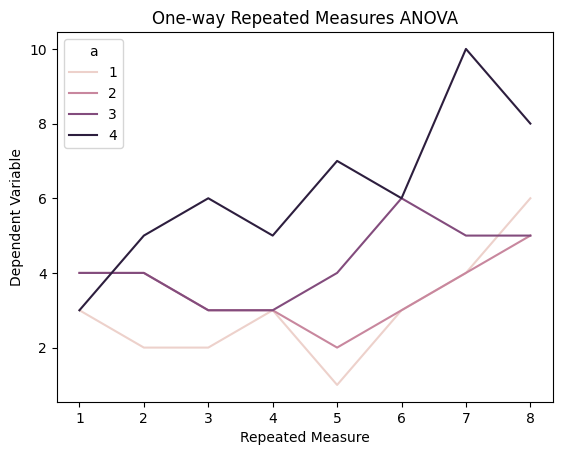

In [5]:
# Generate line plot for one-way repeated measures ANOVA

import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=df, x='s', y='y', hue='a')
plt.title('One-way Repeated Measures ANOVA')
plt.xlabel('Repeated Measure')
plt.ylabel('Dependent Variable')
plt.show()

*** Repeated Measures Logistic Regression ***

In [6]:
### Import necessary libraries

import pandas as pd
import numpy as np

In [7]:
### Load Dataset

df= pd.read_csv("/content/Repeated~LogisticRegression~Exercise~Dataset.csv")
df.head()

,Unnamed: 0,id,diet,exertype,pulse,time,highpulse
0,0,1,1,1,85,1,0
1,1,1,1,1,85,2,0
2,2,1,1,1,88,3,0
3,3,2,1,1,90,1,0
4,4,2,1,1,92,2,0


In [8]:
df.columns

Index(['Unnamed: 0', 'id', 'diet', 'exertype', 'pulse', 'time', 'highpulse'], dtype='object')

In [9]:
# Repeated measures logistic regression
from statsmodels.genmod.bayes_mixed_glm import BinomialBayesMixedGLM
import statsmodels.api as sm

# Assuming df is your DataFrame
formula = 'highpulse ~ diet'
model = sm.MixedLM.from_formula(formula, df, groups='id')
result = model.fit()

# Display the results
print(result.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: highpulse
No. Observations: 90      Method:             REML     
No. Groups:       30      Scale:              0.1333   
Min. group size:  3       Log-Likelihood:     -54.3006 
Max. group size:  3       Converged:          Yes      
Mean group size:  3.0                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  0.067     0.203  0.329  0.742  -0.331   0.464
diet       0.156     0.128  1.213  0.225  -0.096   0.407
id Var     0.079     0.109                              



In [10]:
### REPEATEAD MEASURES LOGISTIC REGRESSION
import statsmodels.formula.api as smf

# Assuming your data is stored in a DataFrame called df5
# Using the MixedLM class for repeated measures logistic regression
mixed_model = smf.mixedlm("highpulse ~ diet + exertype + pulse + time", df, groups=df["id"])
result = mixed_model.fit()
print(result.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: highpulse
No. Observations: 90      Method:             REML     
No. Groups:       30      Scale:              0.0627   
Min. group size:  3       Log-Likelihood:     -25.3412 
Max. group size:  3       Converged:          Yes      
Mean group size:  3.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    -2.068    0.235 -8.789 0.000 -2.530 -1.607
diet         -0.008    0.080 -0.103 0.918 -0.165  0.148
exertype      0.073    0.058  1.272 0.203 -0.040  0.187
pulse         0.022    0.003  7.223 0.000  0.016  0.028
time          0.026    0.037  0.722 0.470 -0.045  0.098
Group Var     0.023    0.059                           



Text(0, 0.5, 'Percentage')

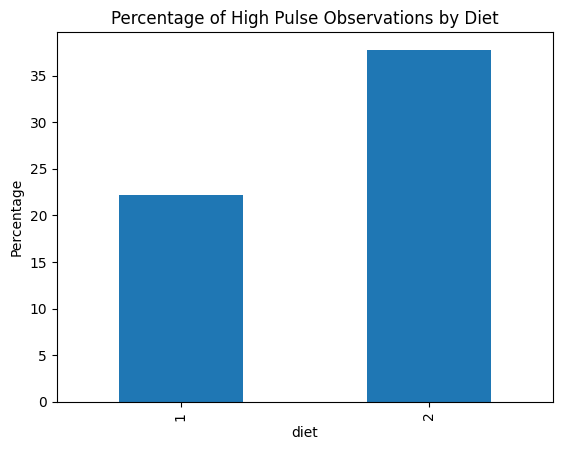

In [11]:
import matplotlib.pyplot as plt

diet_groups = df.groupby('diet')['highpulse'].mean() * 100
diet_groups.plot(kind='bar')

plt.title('Percentage of High Pulse Observations by Diet')
plt.ylabel('Percentage')